# Numerical Simulation Laboratory

## Numerical exercise 2 
La cartella contiene i vari files organizzati nelle seguenti cartelle:
- <font color='red'>**Code**</font>: contiene il codice dei tre esercizi: ogni file è compilabile attraverso il comando *nome_file.exe*.
- **<font color='red'>Files</font>**: contiene i files di output contenenti i dati necessari per costruire i grafici.
- **<font color='red'>Pictures</font>**: contiene eventuali immagini riportate nel notebook.

Il codice è stato organizzato nel seguente modo:
- <font color='red'>*exercise_1.cpp*</font> codice relativo all'esercizio 02.1: soluzione dell'integrale utilizzando i metodi Monte Carlo tramite *uniform sampling* e *importance sampling*.
- <font color='red'>*exercise_2.cpp*</font> codice relativo all'esercizio 02.2: random walk su un reticolo cubico e nel continuo. 
- <font color='red'>*random.cpp*</font> contiene il codice necessario per la generazione di numeri casuali.
- <font color='red'>*statistics.cpp*</font> contiene la definizione di alcune funzioni utilizzate negli esercizi per le stime dei valori medi e delle incertezze statistiche.

### Exercise 02.1
Calcolo del seguente integrale utilizzando i metodi Monte Carlo:
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1 \,.$$

1. <font color='blue'>**Uniform sampling:**</font> determino il valore dell'integrale $I$ utilizzando un metodo Monte Carlo basato su una <font color='blue'>**distribuzione uniforme**</font> di numeri casuali. In particolare, generando valori uniformi nell'intervallo di integrazione $[0,1]$ posso stimare l'integrale come:
$$ I = \frac{1}{M} \sum_{i=1}^{M} \frac{\pi}{2}\cos ( \pi x_i/2 )    \,.$$
Ripetuto il procedimento $N$ volte, posso determinare il valore medio progressivo e la relativa incertezza statistica al variare del numero di blocchi considerati. In particolare indicando con $I_i$ la stima dell'integrale ottenuta tramite l'$i$-esimo blocco di numeri casuali calcolo i seguenti <font color='red'>**valori medi**</font>
    $$ \langle I^2 \rangle = \frac{1}{N} \sum_{i=1}^N I^2_i \quad \quad \langle I\rangle^2 = \left( \frac{1}{N} \sum_{i=1}^N I_i \right)^2 \,,$$
e la <font color='red'>**deviazione standard della media**</font>:
    $$ \frac{\sigma}{\sqrt{N-1}} = \sqrt{\frac{1}{N-1} \left( \langle I^2 \rangle - \langle I\rangle^2  \right)}\,.$$

Il grafico qui riportato mostra il valore stimato $\langle I \rangle$ e la relativa incertezza in funzione del numero di blocchi N considerati per il calcolo delle medie progressive. In particolare questa simulazione è stata ottenuta utilizzando $M=10^5$ valori casuali in ciascuno degli $N=100$ blocchi.

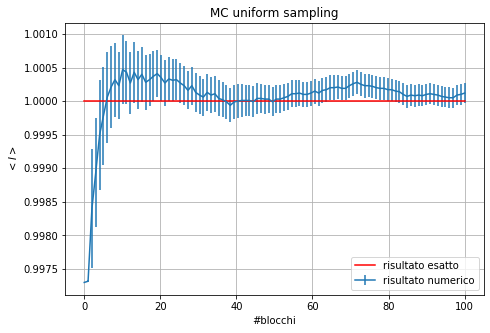

In [18]:
import math
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(7.5, 5))
Iunif, unierr= np.loadtxt('./Files/uniform.out', delimiter = '  ', unpack = 'True')

N=100
x=np.linspace(0,N,N)
y = 1*x**0

plt.errorbar(x, Iunif, yerr=unierr, label='risultato numerico')  #grafico dell'integrale con barre di errore
plt.plot(x, y, color='red', label='risultato esatto')  #grafico del risultato esatto
plt.title('MC uniform sampling')
plt.xlabel('#blocchi')
plt.ylabel('$<I>$')
plt.legend(loc=4)
plt.grid(True)

2. <font color='blue'>**Importance sampling:**</font> determino il valore dell'integrale $I$ utilizzando un metodo Monte Carlo basato su una <font color='blue'>**distribuzione non uniforme**</font> di numeri casuali in modo da ridurre l'errore a parità di blocchi considerati nelle medie progressive. In particolare ho scelto di utilizzare una **probabilità lineare** che segue l'andamento della funzione integranda nell'intervallo di integrazione:
$$ p(x) = \frac{\pi}{2}(1-x)  \,.$$
Per il calcolo Monte Carlo dell'integrale è necessario **normalizzare** sull'intervallo di integrazione $[0,1]$ la distribuzione di probabilità prescelta, ottenendo che la probabilità normalizzata è data da:
$$ P(x) = 2(1-x) \,.$$
Il grafico sottostante mostra il confronto tra la funzione integranda, la distribuzione uniforme e la distribuzione di probabilità normalizzata $P(x)$ utilizzata per stimare l'integrale tramite *importance sampling*. Come è possibile notare, tale distribuzione approssima meglio l'andamento della funzione integranda rispetto alla distribuzione uniforme.
![functions](./Pictures/functions.svg)

Per generare valori casuali distribuiti secondo la probabilità utilizzo il metodo dell'**inversa della funzione cumulativa** che posso determinare facilmente come: 
    $$ F(x) = 2x - x^2 \,. $$
Invertendo tale funzione cumulativa, posso generare valori distribuiti secondo la probabilità normalizzata $P(x)$. In particolare se indico con $y$ una variabile casuale uniforme nell'intervallo $[0,1]$, ottengo la variabile casuale desiderata attraverso la seguente equazione: 
    $$ x = 1 - \sqrt{1-y}  \,.$$

Utilizzando quindi il metodo Monte Carlo **importance sampling**, posso stimare il valore dell'integrale tramite la seguente equazione
$$ I = \frac{1}{M} \sum_{i=1}^{M} \frac{f(x_i)}{p(x_i)}   \,.$$
Analogamente al caso **uniform sampling** ottengo il valore di $I$ per $N$ blocchi attraverso $M$ valori casuali in ciascun blocco e calcolo le medie progressive e le relative incertezze.

Riporto qui il grafico che mostra il valore stimato $\langle I \rangle$ e la relativa incertezza in funzione del numero di blocchi N considerati per il calcolo delle medie progressive. Come nel caso precedente, questa simulazione è stata ottenuta utilizzando $M=10^5$ valori casuali in ciascuno degli $N=100$ blocchi. 

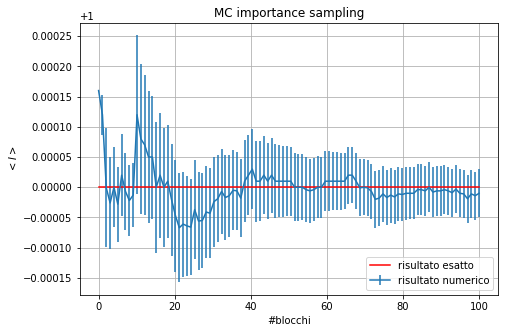

In [17]:
plt.figure(figsize=(7.5, 5))
Iimportance, imperr= np.loadtxt('./Files/importance.out', delimiter = '  ', unpack = 'True')

N=100
x=np.linspace(0,N,N)
y = 1*x**0

plt.errorbar(x, Iimportance, yerr=imperr, label='risultato numerico')  #grafico dell'integrale con barre di errore
plt.plot(x, y, color='red', label='risultato esatto')  #grafico del risultato esatto
plt.title('MC importance sampling')
plt.xlabel('#blocchi')
plt.ylabel('$<I>$')
plt.legend(loc=4)
plt.grid(True)

Gli errori statistici ottenuti al variare del numero di blocchi per entrambi i procedimenti sono riportati nel grafico sottostante. Come si può facilmente osservare, a parità di blocchi su cui è eseguita la media progressiva, l'incertezza sulla stima dell'integrale ottenuta tramite *importance sampling* è circa un quarto rispetto all'incertezza ottenuta tramite *uniform sampling*. 
In particolare il rapporto tra tali incertezze considerando la media cumulativa su tutti i 100 blocchi è pari a $0,2586$. 

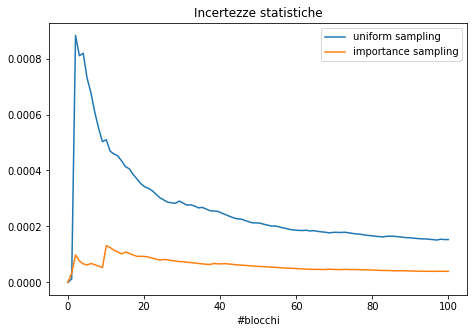

In [20]:
plt.figure(figsize=(7.5, 5))

plt.plot(x, unierr, label='uniform sampling')  #incrtezze uniform sampling
plt.plot(x, imperr, label='importance sampling')  #incertezze importance sampling

plt.title('Incertezze statistiche')
plt.xlabel('#blocchi')
plt.legend()
plt.show()

### Exercise 02.2

1. Simulazione di un random walk in un <font color='blue'> **reticolo cubico** </font> tridimensionale. Tramite generazione di numeri casuali valuto la variazione della posizione di un oggetto che si muove di moto casuale in un reticolo cubico. Ad ogni step successivo, la posizione dell'oggetto può variare in ciascuna delle 6 direzioni spaziali consentite nel reticolo in modo tale che ciascuno spostamento sia di lunghezza pari al passo reticolare $a$.

Poichè la probabilità di avere uno spostamento in una delle tre direzioni principali *x,y,z* è uniforme, genero un valore casuale uniforme nell'intervallo $(0,2)$ e ne considero la parte intera. Assoccio il risultato dell'estrazione casuale allo <font color='red'> spostamento lungo una direzione</font>:
- **0** spostamento in direzione **x**
- **1** spostamento in direzione **y**
- **2** spostamento in direzione **z**

Genero un secondo valore casuale $r$ uniforme nell'intervallo $(0,1)$ in modo da determinare uno <font color='red'> spostamento nel verso positivo o negativo</font> lungo la direzione prescelta:
- $r<0.5$ spostamento nel verso **positivo**
- $r>0.5$ spostamento nel verso **negativo**

Sviluppo la simulazione effettuando $N$ random walk differenti e in ciascuno di essi simulo $M$ step successivi all'interno del reticolo cubico. Per ogni step di ciascun random walk determino il <font color='red'>valore medio del modulo quadro </font> della posizione 
    $$ \langle |r|^2 \rangle = \frac{1}{N} \sum_{i=1}^N r_i \,,$$
e le <font color='red'>relative incertezze</font> corrispondenti alla deviazione standard della media
    $$ \sigma_r = \sqrt{ \frac{1}{N-1} \left[ \frac{1}{N}\sum_i r_i^2 - \left(  \frac{1}{N} \sum_i r_i  \right)^2 \right] } \,,$$
dove $r_i = | \mathbf{r}|^2 $ è il modulo quadro della posizione relativa allo **stesso step** dei differenti random walk.

Il grafico sottostante mostra la radice del valore medio dei moduli quadri in funzione del numero di step effettuati nel random walk con le relative incertezze ottenute tramite propagazione degli errori:
$$ \sigma = \frac{1}{2\sqrt{\langle |r|^2 \rangle}} \sigma_r \,.$$

Il grafico seguente mostra i risultati ottenuti per una simulazione con $N=10^4$ random walk e $M=100$ step ciascuno: la radice del valore medio è rappresentata come **funzione del numero di passi** effettuati nel random walk.

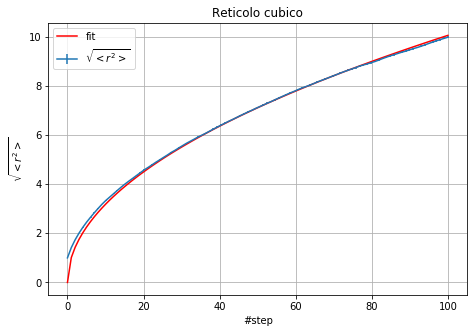

In [24]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

plt.figure(figsize=(7.5, 5))

#importo i valori medi del reticolo cubico
rw, err= np.loadtxt('./Files/RWlattice.out', delimiter = '  ', unpack = 'True')

N=100
x=np.linspace(0,N,N)

#funzione con cui fittare l'andamento
def func(x, k):
    return k*(x**0.5)

popt, pcov = curve_fit(func, x, rw)  #fit del parametro k per il random walk nel reticolo

#grafico della varianza del rw e del fit
plt.errorbar(x, rw, err, label='$\sqrt{<r^2>}$')  #varianza
plt.plot(x, func(x, *popt), color='red', label='fit')  #fit della funzione 

plt.title("Reticolo cubico")
plt.xlabel('#step')
plt.ylabel('$\sqrt{<r^2>}$')
plt.grid(True)
plt.legend()
plt.show()

Il grafico mostra il fit dei valori con l'andamento atteso $f(M)=k\sqrt{M}$. L'andamento atteso è pienamente compatibile con l'andamento effettivo dei dati e anche il valore ottenuto dal fit per il parametro $k=1.0029$ è compatibile col valore atteso $k=1$ mostrando che il comportamento del random walk è un comportamento diffusivo.

2. Simulazione di un random walk nel <font color='blue'> **continuo tridimensionale** </font>. Tramite generazione di numeri casuali valuto la variazione della posizione di un oggetto che si muove di moto casuale in un reticolo continuo. Ad ogni step successivo, l'oggetto può eseguire uno spostamento di lunghezza $a$ in una qualsiasi direzione dello spazio: per determinare la direzione dello spostamento <font color='red'>campiono uniformemente l'angolo solido</font> attraverso la generazione dei valori casuali $\theta \in [0,\pi]$ and $\phi \in [0,2\pi]$ corrispondenti rispettivamente agli angoli polare e azimutale delle coordinate sferiche.

Se generassi i valori degli angoli in modo uniforme sui rispettivi intervalli $\theta \in [0, \pi]$, $\phi \in [0, 2\pi]$ otterrei una distribuzione uniforme sul piano $\theta, \phi$ ma non su una sfera di raggio unitario. Per determinare con quali distribuzioni di probabilità è necessario generare queste due variabili, osservo che normalizzando all'unità la probabilità sull'angolo solido totale ottengo facilmente $P(\Omega) = \frac{1}{4\pi} \,.$ Definendo la probabilità rispetto alle variabili $\theta$ e $\phi$ ottengo
    $$P(\theta, \phi) d\theta d\phi = P(\Omega) d\Omega \quad \quad  P(\theta, \phi) = \frac{1}{4\pi} \sin(\theta) \,, $$
e integrando ricavo le seguenti **distribuzioni di probabilità** per le variabili $\theta$ e $\phi$:
    $$p(\theta) = \frac{sin(\theta)}{2} \quad \quad  p(\phi) = \frac{1}{2\pi} \,.$$
Utilizzando il metodo dell'**inversa della funzione cumulativa** ricavo le distribuzioni cumulative relative alle due variabili casuali
$$ F(\theta) = \frac{1}{2}[1-cos(\theta)] \quad \quad  F(\phi) = 2\pi\phi \,, $$
e invertendole posso generare le due variabili desiderate a partire dai valori casuali $x,y$ uniformemente distribuiti nell'intervallo $[0,1]$:
$$ \theta = \arccos((2x-1) \quad \quad \phi = 2\pi y  \,.$$
A partire da questi valori e ricordando che ogni spostamento ha lunghezza $a$, posso ricavare le coordinate cartesiane corrispondenti alllo spostamento dell'oggetto riferite alla sua posizione di partenza:
- $x=a \sin(\theta) \cos(\phi)$
- $y= a \sin(\theta) \sin(\phi)$
- $z= a \cos(\theta) $

Nei grafici sottostanti ho rappresentato i valori ottenuti su una sfera tridimensionale. Nel primo caso i punti rappresentati sono stati ottenuti campionando le variabili $\theta$,$\phi$ in modo uniforme mentre nel secondo caso ho utilizzato le distribuzioni di probabilità corrette per il campionamento uniforme dell'angolo solido ricavate sopra.

<img src="./Pictures/non uniform.png" align="left" width="50%"/>
<img src="./Pictures/uniform.png" align="left" width="50%"/>

Si può osservare come nel primo caso i punti siano distribuiti in modo uniforme rispetto all'angolo azimutale ma la concentrazione di punti è molto maggiore nei poli rispetto che all'equatore. Nel secondo caso invece la distribuzione è uniforme su tutto l'angolo solido.

Come nel caso precedente, sviluppo la simulazione effettuando $N$ random walk differenti e in ciascuno di essi simulo $M$ step successivi all'interno del reticolo cubico. Per ogni step di ciascun random walk determino il <font color='red'>valore medio del modulo quadro </font> della posizione 
    $$ \langle |r|^2 \rangle = \frac{1}{N} \sum_{i=1}^N r_i \,,$$
e le <font color='red'>relative incertezze</font> corrispondenti alla deviazione standard della media
    $$ \sigma_r = \sqrt{ \frac{1}{N-1} \left[ \frac{1}{N}\sum_i r_i^2 - \left(  \frac{1}{N} \sum_i r_i  \right)^2 \right] } \,,$$
dove $r_i = | \mathbf{r}|^2 $ è il modulo quadro della posizione relativa allo **stesso step** dei differenti random walk.

Il grafico sottostante mostra la radice del valore medio dei moduli quadri in funzione del numero di step effettuati nel random walk con le relative incertezze ottenute tramite propagazione degli errori:
$$ \sigma = \frac{1}{2\sqrt{\langle |r|^2 \rangle}} \sigma_r \,.$$


Il grafico seguente mostra i risultati ottenuti per una simulazione con $N=10^4$ random walk e $M=100$ step ciascuno: la radice del valore medio è rappresentata come **funzione del numero di passi** effettuati nel random walk.

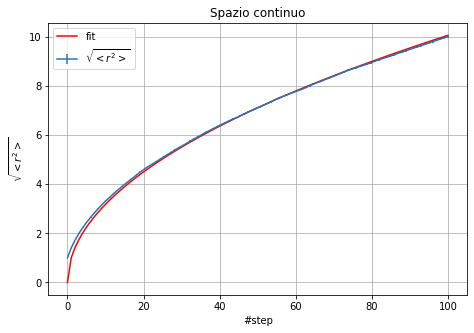

In [30]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

plt.figure(figsize=(7.5, 5))

#importo i valori medi del continuo
rw, err= np.loadtxt('./Files/RWcontinuum.out', delimiter = '  ', unpack = 'True')

N=100
x=np.linspace(0,N,N)

#funzione con cui fittare l'andamento
def func(x, k):
    return k*(x**0.5)

popt, pcov = curve_fit(func, x, rw)  #fit del parametro k per il random walk nel reticolo

#grafico della varianza del rw e del fit
plt.errorbar(x, rw, err, label='$\sqrt{<r^2>}$')  #varianza
plt.plot(x, func(x, *popt), color='red', label='fit')  #fit della funzione 

plt.title("Spazio continuo")
plt.xlabel('#step')
plt.ylabel('$\sqrt{<r^2>}$')
plt.grid(True)
plt.legend()
plt.show()

Il grafico mostra il fit dei valori con l'andamento atteso $f(M)=k\sqrt{M}$. L'andamento atteso è pienamente compatibile con l'andamento effettivo dei dati e anche il valore ottenuto dal fit per il parametro $k=0.9972$ è compatibile col valore atteso $k=1$ mostrando che il comportamento del random walk è un comportamento diffusivo. 